# Communicate-Data-Finding-Exploration-with-Ford-GoBike-System-Data


## Table of Contents
* Introduction of the topic and dataset
* Dataset Investigation and preliminary wrangling
* Further Data Wrangling
* Univariate Exploration and Analysis
* Bivariate Exploration and Analysis
* Multivariate Exploration and Analysis
* Conclusions and answers




## Preliminary Wrangling

* I chose Ford GoBike System Data : https://www.fordgobike.com/system-data as my source data 
* This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco
Bay area.
* Multiple data files will need to be joined together if a full year’s coverage is desired.
* The features included in the dataset : 
Trip Duration (seconds) , Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) , Member Year of Birth, Member Gender

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import zipfile as zf
%matplotlib inline

In [17]:
# here source files seems like csv.zip but can actually be read in just like csv files
#zf = zipfile.ZipFile('C:/Users/Desktop/THEZIPFILE.zip') 
#df = pd.read_csv(zf.open('intfile.csv'))
# do not need to unzip 

# create the path and get the name list under the path 
curDir = os.getcwd()
path = curDir+'/Ford_Go_Bike_Dataset/'
text_files = os.listdir(path)
#text_files

# build the frame df by appending each file
file_list = []
print ("reading data... ")
for text_file in text_files:
    #print(text_file)
    filename = path+text_file
    #print(filename)
    df = pd.read_csv(filename)
    file_list.append(df)
df_bike = pd.concat(file_list) 


df_bike_copy =  df_bike.copy()   
print(df_bike_copy.shape)
df_bike_copy

reading data... 


C:\Users\qxz0kvm\Downloads\softwares\anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



(1863723, 17)


,# This data folder contains 12 months bike sharing data in Greater San Francisco area.,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,NaN,2765.0,No,75284.0,285.0,37.783521,-122.431158,Webster St at O'Farrell St,2018-02-01 19:47:19.8240,1986.0,Male,120.0,37.761420,-122.426435,Mission Dolores Park,2018-01-31 22:52:35.2390,Subscriber
1,NaN,2815.0,No,85422.0,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-01 15:57:17.3100,NaN,NaN,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-01-31 16:13:34.3510,Customer
2,NaN,3039.0,No,71576.0,296.0,37.325998,-121.877120,5th St at Virginia St,2018-02-01 10:16:52.1160,1996.0,Male,304.0,37.348759,-121.894798,Jackson St at 5th St,2018-01-31 14:23:55.8890,Customer
3,NaN,321.0,No,61076.0,47.0,37.780955,-122.399749,4th St at Harrison St,2018-02-01 07:51:20.5000,NaN,NaN,75.0,37.773793,-122.421239,Market St at Franklin St,2018-01-31 14:53:23.5620,Customer
4,NaN,617.0,No,39966.0,19.0,37.788975,-122.403452,Post St at Kearny St,2018-02-01 06:58:31.0530,1991.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2018-01-31 19:52:24.6670,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131360,NaN,2243.0,No,260.0,255.0,37.876573,-122.269528,Virginia St at Shattuck Ave,2018-12-01 00:09:47.9560,1991.0,Male,245.0,37.870139,-122.268422,Downtown Berkeley BART,2018-12-01 00:05:27.6150,Subscriber
131361,NaN,545.0,No,292.0,126.0,37.761634,-122.390648,Esprit Park,2018-12-01 00:07:59.0800,1963.0,Male,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-12-01 00:03:06.5490,Subscriber
131362,NaN,4319.0,No,150.0,119.0,37.761047,-122.432642,18th St at Noe St,2018-12-01 00:05:36.0260,NaN,NaN,107.0,37.763015,-122.426497,17th St at Dolores St,2018-12-01 00:03:05.7420,Subscriber
0,# You need to load them into a single panda da...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# do some data cleaning : drop nan , remove some insignificant features like 
df_bike_copy.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df_bike_copy.drop(df_bike_copy.index[len(df_bike_copy)-2],inplace=True)
df_bike_copy.drop(df.columns[0], axis=1,inplace=True)

df_bike_copy.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_name,start_time,user_type
1,2815.0,No,85422.0,15.0,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-01 15:57:17.3100,NaN,NaN,15.0,San Francisco Ferry Building (Harry Bridges Pl...,2018-01-31 16:13:34.3510,Customer
2,3039.0,No,71576.0,296.0,5th St at Virginia St,2018-02-01 10:16:52.1160,1996.0,Male,304.0,Jackson St at 5th St,2018-01-31 14:23:55.8890,Customer
3,321.0,No,61076.0,47.0,4th St at Harrison St,2018-02-01 07:51:20.5000,NaN,NaN,75.0,Market St at Franklin St,2018-01-31 14:53:23.5620,Customer
4,617.0,No,39966.0,19.0,Post St at Kearny St,2018-02-01 06:58:31.0530,1991.0,Male,74.0,Laguna St at Hayes St,2018-01-31 19:52:24.6670,Subscriber
5,1306.0,No,6477.0,160.0,West Oakland BART Station,2018-02-01 00:46:41.9080,NaN,NaN,236.0,Market St at 8th St,2018-01-31 22:58:44.8670,Customer


In [19]:
df_bike_copy

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_name,start_time,user_type
1,2815.0,No,85422.0,15.0,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-01 15:57:17.3100,NaN,NaN,15.0,San Francisco Ferry Building (Harry Bridges Pl...,2018-01-31 16:13:34.3510,Customer
2,3039.0,No,71576.0,296.0,5th St at Virginia St,2018-02-01 10:16:52.1160,1996.0,Male,304.0,Jackson St at 5th St,2018-01-31 14:23:55.8890,Customer
3,321.0,No,61076.0,47.0,4th St at Harrison St,2018-02-01 07:51:20.5000,NaN,NaN,75.0,Market St at Franklin St,2018-01-31 14:53:23.5620,Customer
4,617.0,No,39966.0,19.0,Post St at Kearny St,2018-02-01 06:58:31.0530,1991.0,Male,74.0,Laguna St at Hayes St,2018-01-31 19:52:24.6670,Subscriber
5,1306.0,No,6477.0,160.0,West Oakland BART Station,2018-02-01 00:46:41.9080,NaN,NaN,236.0,Market St at 8th St,2018-01-31 22:58:44.8670,Customer
...,...,...,...,...,...,...,...,...,...,...,...,...
131359,2034.0,No,841.0,58.0,Market St at 10th St,2018-12-01 00:16:49.7660,1999.0,Female,10.0,Washington St at Kearny St,2018-12-01 00:02:48.7260,Subscriber
131360,2243.0,No,260.0,255.0,Virginia St at Shattuck Ave,2018-12-01 00:09:47.9560,1991.0,Male,245.0,Downtown Berkeley BART,2018-12-01 00:05:27.6150,Subscriber
131361,545.0,No,292.0,126.0,Esprit Park,2018-12-01 00:07:59.0800,1963.0,Male,93.0,4th St at Mission Bay Blvd S,2018-12-01 00:03:06.5490,Subscriber
131362,4319.0,No,150.0,119.0,18th St at Noe St,2018-12-01 00:05:36.0260,NaN,NaN,107.0,17th St at Dolores St,2018-12-01 00:03:05.7420,Subscriber


In [20]:
df_bike_copy.drop(df_bike_copy.index[len(df_bike_copy)-1],inplace=True)


In [21]:
df_bike_copy

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_name,start_time,user_type
2,3039.0,No,71576.0,296.0,5th St at Virginia St,2018-02-01 10:16:52.1160,1996.0,Male,304.0,Jackson St at 5th St,2018-01-31 14:23:55.8890,Customer
3,321.0,No,61076.0,47.0,4th St at Harrison St,2018-02-01 07:51:20.5000,NaN,NaN,75.0,Market St at Franklin St,2018-01-31 14:53:23.5620,Customer
4,617.0,No,39966.0,19.0,Post St at Kearny St,2018-02-01 06:58:31.0530,1991.0,Male,74.0,Laguna St at Hayes St,2018-01-31 19:52:24.6670,Subscriber
5,1306.0,No,6477.0,160.0,West Oakland BART Station,2018-02-01 00:46:41.9080,NaN,NaN,236.0,Market St at 8th St,2018-01-31 22:58:44.8670,Customer
6,3571.0,No,453.0,134.0,Valencia St at 24th St,2018-02-01 00:01:26.8050,1988.0,Male,110.0,17th & Folsom Street Park (17th St at Folsom St),2018-01-31 23:53:53.6320,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...
131358,3035.0,No,473.0,81.0,Berry St at 4th St,2018-12-01 00:19:48.5470,1982.0,Female,345.0,Hubbell St at 16th St,2018-12-01 00:11:54.8110,Subscriber
131359,2034.0,No,841.0,58.0,Market St at 10th St,2018-12-01 00:16:49.7660,1999.0,Female,10.0,Washington St at Kearny St,2018-12-01 00:02:48.7260,Subscriber
131360,2243.0,No,260.0,255.0,Virginia St at Shattuck Ave,2018-12-01 00:09:47.9560,1991.0,Male,245.0,Downtown Berkeley BART,2018-12-01 00:05:27.6150,Subscriber
131361,545.0,No,292.0,126.0,Esprit Park,2018-12-01 00:07:59.0800,1963.0,Male,93.0,4th St at Mission Bay Blvd S,2018-12-01 00:03:06.5490,Subscriber


In [22]:
df_bike_copy.isnull().sum()

bike_id                         0
bike_share_for_all_trip         0
duration_sec                    0
end_station_id              11768
end_station_name            11768
end_time                        0
member_birth_year          110710
member_gender              110359
start_station_id            11768
start_station_name          11768
start_time                      0
user_type                       0
dtype: int64

In [23]:
df_bike_copy.shape

(1863697, 12)

### Data structure 
The data set includes multiple csv files(12 months) with 1863721 rows and 12 features
  

### The following questions are of my interest

 1. How long does the average trip take?
 2. Is the trip duration affected by weather( months/seasons)
 3. Does the above depend on if a user is a subscriber or customer?

### The features I think will help support my investigation into  feature(s) of interest

> Trip Duration (seconds), Start Time and Date , End Time and Date, User Type , Member Year of Birth , Member Gender


## Univariate Exploration

> In this section, investigate distributions of individual variables.

Question 1 : I want to know is " How long does the average trip take?" 

Text(0.5, 0, 'duration_sec')

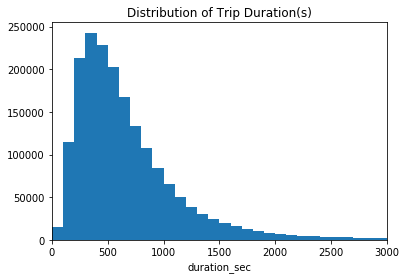

In [24]:
# Let's plot the distribution of trip duration.  
bin_edges = np.arange(0, df_bike_copy['duration_sec'].max() + 100 , 100)
plt.hist(data = df_bike_copy , x = 'duration_sec' , bins = bin_edges)
plt.xlim(0,3000)
plt.title('Distribution of Trip Duration(s)')
plt.xlabel('duration_sec')

> It is right screwed with a long tail on the right. I am going to add log transformation to x axis.  
 

> It is really difficult to look at the plot. I had to increase the bin width to 100 to let the plot show. Measuring trip using seconds is not reasonable.  I would change the "duration_sec" to "duration_min" before I add any log transformation . 

Text(0, 0.5, 'Frequency')

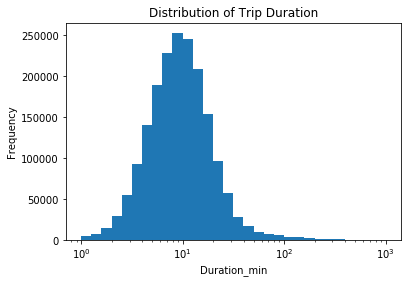

In [28]:
# change the trip duration unit from second to min 
df_bike_copy['duration_min'] = df_bike_copy['duration_sec'] / 60
df_bike_copy.drop('duration_sec' , axis = 1 , inplace = True)

bin_edges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_bike_copy , x = 'duration_min' , bins = bin_edges);
plt.xticks(ticks,labels);
plt.xlabel('Duration_min');
plt.xscale('log');
plt.title('Distribution of Trip Duration')
plt.ylabel('Frequency')



we can see through the plot, most people tend to use the bikes for short-time trips ( around 10 mins).
Does weather affect the trip duration ?  ( compare trip duration difference of spring, summer autumn, winter )

## Bivariate Exploration

> In this section, I would investigate relationships between pairs of variables in the data. 

In [29]:
# some data engineering should be conducted: 
# create month_start column by extracting months of start_time 

df_bike_copy['month_start'] = pd.DatetimeIndex(df_bike_copy['start_time']).month
df_bike_copy['month_start'].value_counts()



10    201456
7     199220
6     195966
8     192160
9     186215
5     179123
11    134133
12    131361
4     131167
3     111380
2     106716
1      94800
Name: month_start, dtype: int64

 Question 2. Does weather(month) affect the trip duration ? 

Text(0, 0.5, 'Trip Duration(min)')

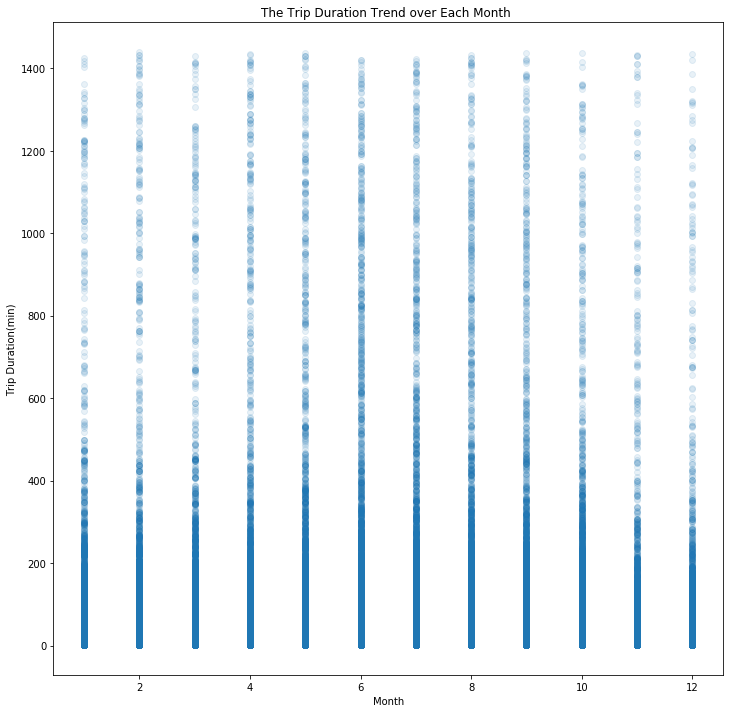

In [30]:
# We can check the trip duration over changes over each month.
plt.figure(figsize = [12,12]) # make the whole figure bigger to show all 
plt.scatter(data = df_bike_copy , x = 'month_start' , y = 'duration_min' , alpha = 0.1 )
plt.title('The Trip Duration Trend over Each Month ')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)')

June to Auguts in 2018 has the most duration. Other seasons do not have significant difference. 

 Will weather(season) show a more obvious affect on trip duration ?  

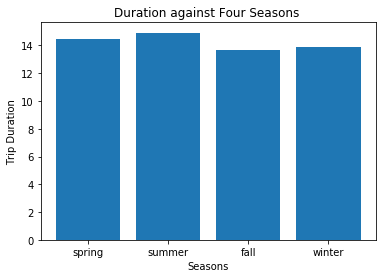

In [31]:
# Create 4 season categories
spring_dur = df_bike_copy.query('month_start in ["3" , "4" , "5"]' ).duration_min.mean ()
summer_dur = df_bike_copy.query('month_start in ["6" , "7" , "8"] ').duration_min.mean()
fall_dur = df_bike_copy.query('month_start in ["9" , "10" , "11"] ').duration_min.mean()
winter_dur = df_bike_copy.query('month_start in ["12" , "1" , "2"]' ).duration_min.mean()
# here the month must be double quote characters, otherwise, give me systax errors


plt.bar(['spring','summer','fall','winter'],[spring_dur , summer_dur , fall_dur , winter_dur] )
plt.title('Duration against Four Seasons ')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration');

In [32]:
spring_dur , summer_dur , fall_dur , winter_dur

(14.46306056869107, 14.918492620476659, 13.65098916451396, 13.882974542148322)

* As we expected, summer has the longest trip duration , with average above 14 mins. 
* But there is no significant difference of trip duration in terms of four seasons.
It is probably because the weather in San Francisco bay area does not change that much.
* What surprised me the most is fall has the lowest trip duration in 2018. 
Fall is most likely to experience good weather with pleasant average temperatures in SF. 
People are more likely to go out and exercise . 
* After checking the news, it is likely caused by Wildfires in Northern California(11/9/2018) 
which lead to the worst air quality in SF for months.


> The weather does affect trip duration, but the affect is very limited. Unlike cities like Boston, New York, which have very different four seasons, the weather in SF does not change that much. 

> What surprised me is that the lower mean trip durations occur in Spring and Fall. In terms of Fall, one reason could be that the air quality in fall 2018 SF was really bad, which prevented more people doing outdoor activities. 
What could be the potential factor for lower trip duration in Spring  ? I want to see if the user type could be a reason. 

## Multivariate Exploration

> Create plots of three or more variables to investigate the data even further.The investigations are justified, and follow from my work in the previous sections.

Question 4 : Does user type lead to the lower trip duration  ? 

C:\Users\qxz0kvm\Downloads\softwares\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


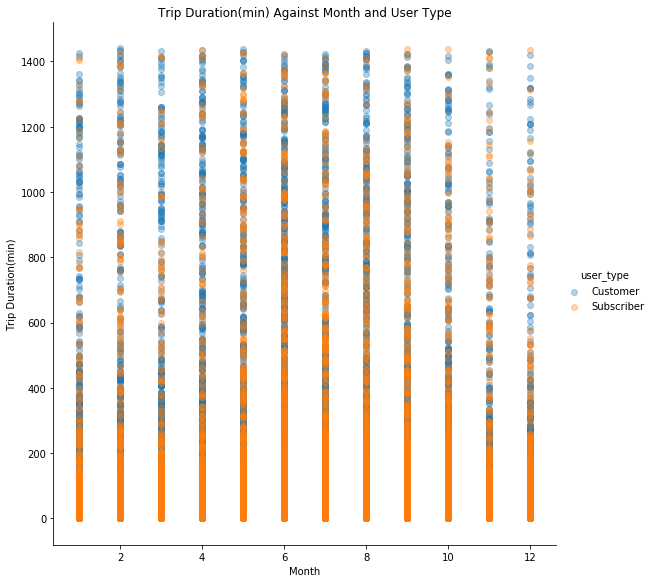

In [33]:
# I want to find out if user type lead to the lower trip duration 

g = sb.FacetGrid(data =  df_bike_copy, hue = 'user_type', size = 8)
g.map(plt.scatter, 'month_start','duration_min', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration(min) Against Month and User Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');



> As we can see through the plot above, there are far more customers than subscribers. The user type does make an impact on trip duration. 

> An interesting point is that subscribers tend to rent the bikes for long trips, above 300 minutes. 